# Adapted Wasserstein Distance between Gaussian Process in Discrete Time

This Jupyter notebook demonstrates how to compute the Adapted Wasserstein squared distance 
between two Gaussian processes. This computed distance will be used as a benchmark 
for approximations in future studies.

In [2]:
import sys
import os
import time
import numpy as np
import matplotlib.pyplot as plt

# Get the absolute path of src/ directory
notebooks_path = os.path.abspath(os.getcwd())  # Get the notebook’s current directory
src_path = os.path.abspath(os.path.join(notebooks_path, "../src"))

# Ensure src is in sys.path
if src_path not in sys.path:
    sys.path.insert(0, src_path)  # Insert at the beginning to prioritize it

# Import necessary modules from src
from benchmark_value_gaussian.Comp_AWD2_Gaussian import (
    build_mean_and_cov, adapted_wasserstein_squared
)

# Define parameters
a, b = 1, 2
var_a, var_b = 1**2, 0.5**2
t = 5

# Build mean and covariance matrices for both processes
a_vec, A_mat = build_mean_and_cov(t, mean_val=a, var_factor=var_a)
b_vec, B_mat = build_mean_and_cov(t, mean_val=b, var_factor=var_b)

# Compute adapted Wasserstein squared distance
distance_squared = adapted_wasserstein_squared(a_vec, A_mat, b_vec, B_mat)
distance = np.sqrt(distance_squared)

print(f"Adapted Wasserstein Squared Distance: {distance_squared:.4f}")
print(f"Adapted Wasserstein Distance: {distance:.4f}")

Adapted Wasserstein Squared Distance: 8.7500
Adapted Wasserstein Distance: 2.9580


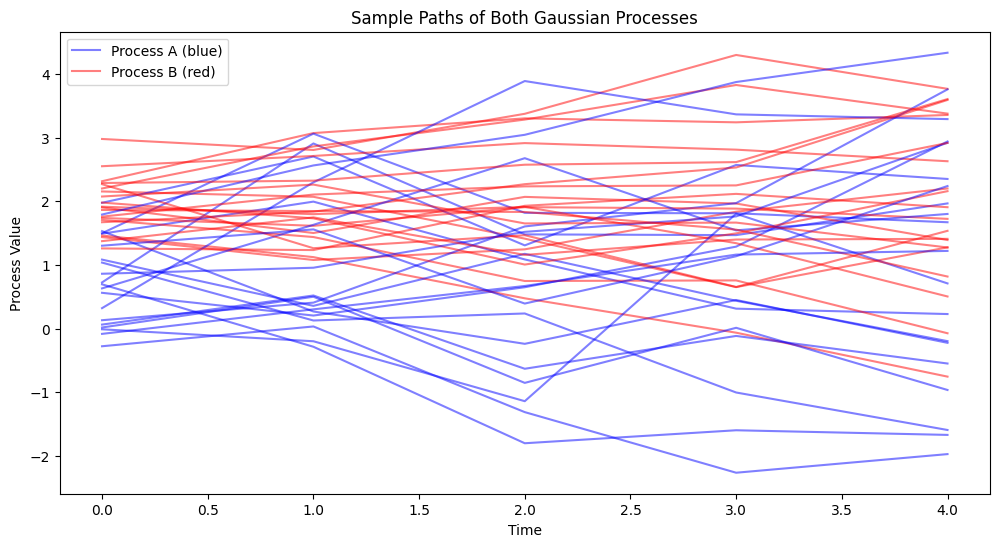

In [3]:
# Generate sample paths
num_samples = 20
np.random.seed(42)

samples_a = np.random.multivariate_normal(a_vec, A_mat, size=num_samples)
samples_b = np.random.multivariate_normal(b_vec, B_mat, size=num_samples)

time_points = np.arange(t)

# Plot sample paths
plt.figure(figsize=(12, 6))
for i in range(num_samples):
    plt.plot(time_points, samples_a[i], color='blue', alpha=0.5)
    plt.plot(time_points, samples_b[i], color='red', alpha=0.5)

plt.xlabel("Time")
plt.ylabel("Process Value")
plt.title("Sample Paths of Both Gaussian Processes")
plt.legend(["Process A (blue)", "Process B (red)"])
plt.show()

In [5]:
mean = np.zeros(5)

def nearest_pd(A):
    """Find the nearest positive-definite matrix to A."""
    B = (A + A.T) / 2
    _, s, V = np.linalg.svd(B)
    H = V.T @ np.diag(s) @ V
    A2 = (B + H) / 2
    A3 = (A2 + A2.T) / 2
    # Ensure positive definiteness by adding a small identity matrix if needed.
    if is_pd(A3):
        return A3
    spacing = np.spacing(np.linalg.norm(A))
    I = np.eye(A.shape[0])
    k = 0.5
    while not is_pd(A3):
        A3 += I * spacing * k
        k += 1
    return A3

def is_pd(B):
    """Return True if B is positive-definite."""
    try:
        np.linalg.cholesky(B)
        return True
    except np.linalg.LinAlgError:
        return False


# Covariance Matrix Sigma2:
# - Variances: [25, 5, 16, 3.2, 9] corresponding to std devs: 5, ~2.24, 4, ~1.79, 3.
# - Sparse, extreme off-diagonals: a strong negative tie between X1 and X3 and smaller interactions elsewhere.
Sigma2 = np.array([
    [25,    0,   -20,    0,    1.5],
    [0,     5,     0,  -0.4,    0],
    [-20,   0,    16,    0,   -1.2],
    [0,   -0.4,    0,   3.2,    0],
    [1.5,   0,   -1.2,    0,    9]
])
Sigma2 = (Sigma2 + Sigma2.T) / 2  # ensure symmetry



sigma2_pd = nearest_pd(Sigma2)

# Define parameters
a, b = 1, 2
var_a, var_b = 1**2, 0.5**2
t = 5

# Build mean and covariance matrices for both processes
a_vec, A_mat = build_mean_and_cov(t, mean_val=a, var_factor=var_a)

# Compute adapted Wasserstein squared distance
distance_squared = adapted_wasserstein_squared(a_vec, A_mat, mean, sigma2_pd)
distance = np.sqrt(distance_squared)

print(f"Adapted Wasserstein Squared Distance: {distance_squared:.4f}")
print(f"Adapted Wasserstein Distance: {distance:.4f}")

Adapted Wasserstein Squared Distance: 61.9559
Adapted Wasserstein Distance: 7.8712
